In [ ]:
!pip install rasterio

In [ ]:
!pip install image

In [ ]:
import keras #idk how to use this one
import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import skimage
from pylab import imshow
import time
import pandas as pd
from functools import reduce

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
#data collecition

#to be automated
#currently set up for data on 2020-01-19

#image
B2 = Image.open("B2 image 2020-01-19.tif")
B3 = Image.open("B3 image 2020-01-19.tif")
B4 = Image.open("B4 image 2020-01-19.tif")
B8 = Image.open("B8 image 2020-01-19.tif")
B8A = Image.open("B8A image 2020-01-19.tif")
B11 = Image.open("B11 image 2020-01-19.tif")

B2arr = np.array(B2)
B3arr = np.array(B3)
B4arr = np.array(B4)
B8arr = np.array(B8)
B8Aarr = np.array(B8A)
B11arr = np.array(B11)

#pre-image
B2p = Image.open("B2 pre-image 2020-01-19.tif")
B3p = Image.open("B3 pre-image 2020-01-19.tif")
B4p = Image.open("B4 pre-image 2020-01-19.tif")
B8p = Image.open("B8 pre-image 2020-01-19.tif")
B8Ap = Image.open("B8A pre-image 2020-01-19.tif")
B11p = Image.open("B11 pre-image 2020-01-19.tif")

B2parr = np.array(B2p)
B3parr = np.array(B3p)
B4parr = np.array(B4p)
B8parr = np.array(B8p)
B8Aparr = np.array(B8Ap)
B11parr = np.array(B11p)


fp = Image.open("floodpixels 2020-01-19.tif")
fparr = np.array(fp)

rgb = np.dstack((B4arr,B3arr,B2arr))
rgbp = np.dstack((B4parr,B3parr,B2parr))

In [ ]:
print(type(B2arr[1][1]))
#print(len(B2arr))

rgb = np.dstack((B4arr,B3arr,B2arr))
rgbp = np.dstack((B4parr,B3parr,B2parr))
print(len(rgb[0]))
print(len(rgb))

In [ ]:
#show rgb for image
print(len(rgb))
imshow((rgb*255).astype(np.uint8))

In [ ]:
#show rgb for pre-image
imshow((rgbp*255).astype(np.uint8))

In [ ]:
#show flood pixels
#pixels stored as 1 in matrix so multiply by 255, alternatively could cast to a float
blufp = fparr*255
#blufp = fparr.astype(float)
imshow(blufp)

In [ ]:
#ndwi function given an image (array), returns ndwi image (array)
#returns nan because np.divide is weird
def ndwi_img(image):
  
  #init
  lnth = len(image[0])
  im = np.zeros((lnth, lnth))

  #ndwi = (B3-B8A)/(B3+B8A)

  #convert to float for division
  band3 = image[1].astype(float)
  band8a = image[4].astype(float)

  sub = np.subtract(band3, band8a)
  add = np.add(band3, band8a)
  ndwi = np.divide(sub, add, out=np.zeros_like(sub), where=add!=0)

  return ndwi

In [ ]:
#training per-pixel

#identifying features
features = ["nonflood", "flood"]

#image array of bands
imarr = [B2arr,B3arr,B4arr,B8arr,B8Aarr,B11arr]

#preimage array of bands
imparr = [B2parr,B3parr,B4parr,B8parr,B8Aparr,B11parr]

#find nonzero indicies of flood pixels array
#returns tuple of 2 arrays with indicies
fparrI = np.nonzero(fparr)#indicies of flood pixels
fparrnI = np.where(fparr == 0)#indicies where there are no flood pixels

#print(fparrI)

#nonzeros of s2 image, if all band values are 0, there's no data for it, so just remove them
#currently finds indicies of non zero elements of all bands and finds the intersection
imgurr = [0,0,0,0,0,0]
i=0
while i < 6:
  imgurr[i] = np.nonzero(imarr[i])
  print(len(imgurr[i][1]))
  i = i+1


print(len(imgurr[1]))

#\/\/no\/\/
#find their intersections
#img_pixels = reduce(np.intersect1d, (img[0],img[1],img[2],img[3],img[4],img[5]))
#these should be pixels with nonzero band values 

#^^this can only be done in 2d

#img_pixels0 = img_pixels[0]
#img_pixels1 = img_pixels[1]

#print(len(img[0][1]))
#print(len(img_pixels))
#print(len(img_pixels))

#now wee need intersection between flooded/non pixels and img_pixels to check where there is no band data



#of particular image, select pixels with above indicies
#and put them in array of classified data

#split up tuple into usable arrays and intersect with pixels
#axis0 = np.intersect1d(fparrI[0], img_pixels0)
#axis1 = np.intersect1d(fparrI[1], img_pixels1)

#axisn0 = np.intersect1d(fparrnI[0], img_pixels0)
#axisn1 = np.intersect1d(fparrnI[1], img_pixels1)
#print(len(axis1))
#print(len(axisn1))

ndwi_image = ndwi_img(imarr)

#print(np.nonzero(ndwi_image))

#ndwi map
imshow(ndwi_image)

In [ ]:
import random

#image array of bands
imarr = [B2arr,B3arr,B4arr,B8arr,B8Aarr,B11arr]

#preimage array of bands
imparr = [B2parr,B3parr,B4parr,B8parr,B8Aparr,B11parr]


#where no band values are 0

#first sum the bands, then take nonzeros

#S2 summation
ar1 = np.add(imarr[0],imarr[1])
ar2 = np.add(imarr[2],imarr[3])
ar3 = np.add(imarr[4],imarr[5])

ar12 = np.add(ar1,ar2)
artot = np.add(ar12,ar3)

#nonzeros
nfparrI = np.nonzero(artot)
print(len(nfparrI[1]))

#randomly pick mx* number of non flood pixels if there are more flood pixels

#create empty tuple of 2 arrays
notfparrI = [0,0]

#mx is multiplier of how many non flood pixels to take, mx*(no. of flood pixels) = no. of non flood pixels chosen
mx = 3
flength = len(fparrI[0])
nflength = len(nfparrI[0])
if(len(nfparrI[0])>mx*len(fparrI[0])):
  #first choose indicies randomly
  indarr = random.sample(range(0,nflength,1), mx*flength)
  notfparrI[0] = nfparrI[0][indarr]
  notfparrI[1] = nfparrI[1][indarr]

print(len(notfparrI[0])/(mx*flength)) #==1?

In [ ]:
print(len(fparrI))

In [ ]:
import random

#non flood pixel generator, choose a random offset from a flooded pixel
#then check that value in floodpixels array, if it is, then dont add it
#NB this is a lazy way to do and will take a long time with larger images

notfparrI = [0,0]
temp0 = []
temp1 = []
mx=10 #10*mx pixels end up being chosen, so choose a large number, then take a random subset, same size as number of flood pixels
i=0
while(i<len(fparrI[0])):

  count=0
  while(count<mx):

    #generate random offset in each dimension within [-5,5]
    off0 = random.randint(-5,5);
    off1 = random.randint(-5,5);

    #array indicies with index
    it0 = fparrI[0][i]+off0
    it1 = fparrI[1][i]+off1

    #check that these indicies are within range, otherwise
    #this offset won't be considered
    if((it0<len(fparr[0])-1) and (it1<1+len(fparr[1])-1)):
      #if that is not a flood pixel, add to notfparrI
      if(fparr[fparr[0][it0],fparr[1][it1]] != 1):
        #print("fasf")
        temp0.append(it0)
        temp1.append(it1)

    count = count+1


  i = i+1

print("length difference:", len(temp0)-len(temp1))#should be 0
print("length (mx*no. of flood pixels):", len(temp0))

#initialise empty stuff
nonfparrI = [0,0]
nonfparrI[0] = np.array(temp0)
nonfparrI[1] = np.array(temp1)

#randomly select flength non flood pixels
flength = len(fparrI[0])
nflength = len(temp0)
if(len(nfparrI[0])>mx*len(fparrI[0])):
  indarr = random.sample(range(0,nflength,1), flength)
  indarr.sort()
  print("Pixels selected:", len(indarr))
  notfparrI[0] = nonfparrI[0][indarr]
  notfparrI[1] = nonfparrI[1][indarr]

print(temp1)

In [ ]:
print(indarr)

In [ ]:
pixel_index = [0,0,0,0,0,0]
non_pixel_index = [0,0,0,0,0,0]
p_pixel_index = [0,0,0,0,0,0]
p_non_pixel_index = [0,0,0,0,0,0]



#image array of bands
imarr = [B2arr,B3arr,B4arr,B8arr,B8Aarr,B11arr]

#preimage array of bands
imparr = [B2parr,B3parr,B4parr,B8parr,B8Aparr,B11parr]
#
i=0;
while i < 6:
  tmp = imarr[i]
  p_tmp = imparr[i]
  pixel_index[i] = tmp[fparrI[0],fparrI[1]]
  p_pixel_index[i] = p_tmp[fparrI[0],fparrI[1]]
  non_pixel_index[i] = tmp[notfparrI[0],notfparrI[1]]
  p_non_pixel_index[i] = p_tmp[notfparrI[0],notfparrI[1]]
  i=i+1

print(len(pixel_index[5]))

#save to txt
np.savetxt("floodpixels.txt", np.array(pixel_index), fmt="%s")
np.savetxt("pfloodpixels.txt", np.array(p_pixel_index), fmt="%s")
np.savetxt("nonfloodpixels.txt", np.array(non_pixel_index), fmt="%s")
np.savetxt("pnonfloodpixels.txt", np.array(p_non_pixel_index), fmt="%s")
#imagedata.txt has pixel values for each band where there were flooded pixels

#todo - the arrays should be the image-preimage
#need to get when !(all bands == 0) so we don't get junk

df = pd.DataFrame(pixel_index)
df.to_csv("data.csv")

#check dimensions make sense
def dim(a):
  if not type(a) == list:
        return []
  return [len(a)] + dim(a[0])

print(dim(pixel_index))

In [ ]:
#reading SAR data from txt, takes a while

#open vh, vv images
f = open("VH image 2020-01-19.tif.txt")
VHarr = np.loadtxt(f,delimiter=",")
f.close()

f = open("VV image 2020-01-19.tif.txt")
VVarr = np.loadtxt(f,delimiter=",")
f.close()


#open vh, vv preimages
f = open("VH pre-image 2020-01-19.tif.txt")
VHparr = np.loadtxt(f,delimiter=",")
f.close()

f = open("VV pre-image 2020-01-19.tif.txt")
VVparr = np.loadtxt(f,delimiter=",")
f.close()


##convert to arrays (redundant)
#VHarr = np.array(VH)
#VVarr = np.array(VV)
#VHparr = np.array(VHp)
#VVparr = np.array(VVp)

In [ ]:
#open flood pixels, done already but for readability
fp = Image.open("floodpixels 2020-01-19.tif")
fparr = np.array(fp)

fparrI = np.nonzero(fparr)#indicies of flood pixels
fparrnI = np.where(fparr == 0)#indicies where there are no flood pixels

pixel_index = [0,0]
non_pixel_index = [0,0]

i=0
while i<2:

  pixel_index[i] = fparrI[i]
  non_pixel_index[i] = fparrnI[i]

  i = i+1

#rescale these to positions in the new image in case of different dimensions (although same area coverage)
L = len(B2arr[1])
H = len(B2arr)
Lprime = len(VHarr[1])
Hprime = len(VHarr)

#print to check
print(L,H,Lprime,Hprime)

#precalculate ratios
Lrat = Lprime/L
Hrat = Hprime/H

#print to check
print(Lrat,Hrat)

print("old fpx:", pixel_index[0][123])
print("old fpy:", pixel_index[1][123])
print("old nfpx:", non_pixel_index[0][123])
print("old nfpy:", non_pixel_index[1][123])


#replace pixel arrays with scaled index values
#flood pixels
pixel_index[0] = np.int_(np.round(pixel_index[0]*Hrat))
pixel_index[1] = np.int_(np.round(pixel_index[1]*Lrat))
#non flood pixels
non_pixel_index[0] = np.int_(np.round(non_pixel_index[0])*Hrat)
non_pixel_index[1] = np.int_(np.round(non_pixel_index[1])*Lrat)

#check if the new values go out of bounds of new image, if so, reduce by 1
#very inefficient btw
lenpi = len(fparr[0])
nlenpi = len(fparrnI[0])
i=0
while i < len(pixel_index[0]):

  #get array elements to avoid extra calls
  pi0 = pixel_index[0][i]
  pi1 = pixel_index[1][i]
  npi0 =non_pixel_index[0][i]
  npi1 =non_pixel_index[1][i]

  #check if out of bounds and put in bounds if they are out of bounds
  pixel_index[0][i] = pi0 if pi0 < lenpi else pi0-1
  pixel_index[1][i] = pi1 if pi1 < lenpi else pi1-1
  non_pixel_index[0][i] = npi0 if npi0 < nlenpi else npi0-1
  non_pixel_index[1][i] = npi1 if npi1 < nlenpi else npi1-1

  #increment
  i=i+1



#print check
print("new fpx:", pixel_index[0][123])
print("new fpy:", pixel_index[1][123])
print("new nfpx:", non_pixel_index[0][123])
print("new nfpy:", non_pixel_index[1][123])

fparrI = [0,0]
fparrnI = [0,0]

i=0
while i<2:

  fparrI[i] = pixel_index[i]
  fparrnI[i] = non_pixel_index[i]

  i = i+1



In [ ]:
#show plot of image
imshow(VHarr)

In [ ]:
#find the difference between flood/non flood (image-preimage)
subtractarrVV = np.subtract(VVarr,VVparr)
subtractarrVH = np.subtract(VHarr,VHparr)
imarr = [subtractarrVH,subtractarrVV]

#print(subtractarrVV)

#find flood pixels and non flood pixels
#pixel_index = subtractarr[fparrI[0],fparrI[1]]
#non_pixel_index = subtractarr[notfparrI[0],notfparrI[1]]
#non flood pixel index just uses the same as for the S2 images so it is definitely in the same bounds

#find flood pixels and non flood pixels
pixel_index = [0,0]
non_pixel_index = [0,0]
#
i=0;
while i < 2:
  tmp = imarr[i]
  pixel_index[i] = tmp[fparrI[0],fparrI[1]]
  non_pixel_index[i] = tmp[notfparrI[0],notfparrI[1]]
  i=i+1



#save to txt
np.savetxt("floodpixelsS1.txt", np.array(pixel_index), fmt="%s")
np.savetxt("nonfloodpixelsS1.txt", np.array(non_pixel_index), fmt="%s")

In [ ]:
###OBSOLETED CELL

#reading SAR data

#open vh, vv images
VH = Image.open("VH image 2020-01-19.tif")
VV = Image.open("VV image 2020-01-19.tif")


#open vh, vv preimages
VHp = Image.open("VH pre-image 2020-01-19.tif")
VVp = Image.open("VV pre-image 2020-01-19.tif")

#convert to arrays
VHarr = np.array(VH)
VVarr = np.array(VV)

VHparr = np.array(VHp)
VVparr = np.array(VVp)

#open flood pixels, done already but for readability
fp = Image.open("floodpixels 2020-01-19.tif")
fparr = np.array(fp)

junk below

In [ ]:
#select flood pixels from image, this cell is just for timing

#flood_img_pixels = img[[fparrIi[:,0],fparrI[:,1]]

img = imarr[0]

#less bad but still bad
start = time.time()
flood_img_pixels = []
for i,j in zip(axis1,axis2):
    flood_img_pixels.append(img[i][j])
end = time.time()
print(end-start, "s time iterating")
print(len(flood_img_pixels),"sfafsdg")

#good
start = time.time()
fpick = img[fparrI[0],fparrI[1]]
end = time.time()
print(end-start, "s time vectorizing")
print(len(fpick),"wwww")

0.0006158351898193359 s time iterating
487 sfafsdg
0.00013256072998046875 s time vectorizing
487 wwww


487 sfafsdg
487 wwww


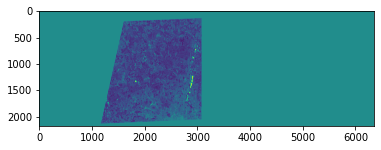

In [ ]:
#training per-pixel

#identifying features
features = ["nonflood", "flood"]

#image array of bands
imarr = [B2arr,B3arr,B4arr,B8arr,B8Aarr,B11arr]

#preimage array of bands
imparr = [B2parr,B3parr,B4parr,B8parr,B8Aparr,B11parr]

#find nonzero indicies of flood pixels array
#returns tuple of 2 arrays with indicies
fparrI = np.nonzero(fparr)

#print(fparrI)

#of particular image, select pixels with above indicies
#and put them in array of classified data

#split up tuple into usable arrays
axis1 = fparrI[0]
axis2 = fparrI[1]


#select flood pixels from image
ww = len(axis1)

##expanding to rgb image
rgb = np.dstack((imarr[2],imarr[1],imarr[0]))

rgb_flood_pixels = []
for i in axis1:
  rgb_flood_pixels.append(rgb[i][i])

#rgb_flood_pixels is 3d array
#print(rgb_flood_pixels)

#print(len(B2arr))


#now have ndwi of image, flood pixel indicies
#index by array
#save flood data